<a href="https://colab.research.google.com/github/ArghyaPal/MR_SOTA/blob/main/GRAPPA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MR image reconstruction using GRAPPA

1. Shepp-Logan phantom is first undersampled
2. Then reconstructed using GRAPPA


In [ ]:
## Copyright (C) 2010  Alex Opie  <lx_op@orcon.net.nz>
##
## This program is free software; you can redistribute it and/or modify it
## under the terms of the GNU General Public License as published by
## the Free Software Foundation; either version 3 of the License, or (at
## your option) any later version.
##
## This program is distributed in the hope that it will be useful, but
## WITHOUT ANY WARRANTY; without even the implied warranty of
## MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.	See the GNU
## General Public License for more details.
##
## You should have received a copy of the GNU General Public License
## along with this program; see the file COPYING.  If not, see
## <http://www.gnu.org/licenses/>.

import numpy as np

def phantom (n = 64, p_type = 'Modified Shepp-Logan', ellipses = None):
	"""
	 phantom (n = 256, p_type = 'Modified Shepp-Logan', ellipses = None)
	
	Create a Shepp-Logan or modified Shepp-Logan phantom.

	A phantom is a known object (either real or purely mathematical) 
	that is used for testing image reconstruction algorithms.  The 
	Shepp-Logan phantom is a popular mathematical model of a cranial
	slice, made up of a set of ellipses.  This allows rigorous 
	testing of computed tomography (CT) algorithms as it can be 
	analytically transformed with the radon transform (see the 
	function `radon').
	
	Inputs
	------
	n : The edge length of the square image to be produced.
	
	p_type : The type of phantom to produce. Either 
	  "Modified Shepp-Logan" or "Shepp-Logan".  This is overridden
	  if `ellipses' is also specified.
	
	ellipses : Custom set of ellipses to use.  These should be in 
	  the form
	  	[[I, a, b, x0, y0, phi],
	  	 [I, a, b, x0, y0, phi],
	  	 ...]
	  where each row defines an ellipse.
	  I : Additive intensity of the ellipse.
	  a : Length of the major axis.
	  b : Length of the minor axis.
	  x0 : Horizontal offset of the centre of the ellipse.
	  y0 : Vertical offset of the centre of the ellipse.
	  phi : Counterclockwise rotation of the ellipse in degrees,
	        measured as the angle between the horizontal axis and 
	        the ellipse major axis.
	  The image bounding box in the algorithm is [-1, -1], [1, 1], 
	  so the values of a, b, x0, y0 should all be specified with
	  respect to this box.
	
	Output
	------
	P : A phantom image.
	
	Usage example
	-------------
	  import matplotlib.pyplot as pl
	  P = phantom ()
	  pl.imshow (P)
	
	References
	----------
	Shepp, L. A.; Logan, B. F.; Reconstructing Interior Head Tissue 
	from X-Ray Transmissions, IEEE Transactions on Nuclear Science,
	Feb. 1974, p. 232.
	
	Toft, P.; "The Radon Transform - Theory and Implementation", 
	Ph.D. thesis, Department of Mathematical Modelling, Technical 
	University of Denmark, June 1996.
	
	"""
	
	if (ellipses is None):
		ellipses = _select_phantom (p_type)
	elif (np.size (ellipses, 1) != 6):
		raise AssertionError ("Wrong number of columns in user phantom")
	
	# Blank image
	p = np.zeros ((n, n))

	# Create the pixel grid
	ygrid, xgrid = np.mgrid[-1:1:(1j*n), -1:1:(1j*n)]

	for ellip in ellipses:
		I   = ellip [0]
		a2  = ellip [1]**2
		b2  = ellip [2]**2
		x0  = ellip [3]
		y0  = ellip [4]
		phi = ellip [5] * np.pi / 180  # Rotation angle in radians
		
		# Create the offset x and y values for the grid
		x = xgrid - x0
		y = ygrid - y0
		
		cos_p = np.cos (phi) 
		sin_p = np.sin (phi)
		
		# Find the pixels within the ellipse
		locs = (((x * cos_p + y * sin_p)**2) / a2 
              + ((y * cos_p - x * sin_p)**2) / b2) <= 1
		
		# Add the ellipse intensity to those pixels
		p [locs] += I

	return p


def _select_phantom (name):
	if (name.lower () == 'shepp-logan'):
		e = _shepp_logan ()
	elif (name.lower () == 'modified shepp-logan'):
		e = _mod_shepp_logan ()
	else:
		raise ValueError ("Unknown phantom type: %s" % name)
	
	return e


def _shepp_logan ():
	#  Standard head phantom, taken from Shepp & Logan
	return [[   2,   .69,   .92,    0,      0,   0],
	        [-.98, .6624, .8740,    0, -.0184,   0],
	        [-.02, .1100, .3100,  .22,      0, -18],
	        [-.02, .1600, .4100, -.22,      0,  18],
	        [ .01, .2100, .2500,    0,    .35,   0],
	        [ .01, .0460, .0460,    0,     .1,   0],
	        [ .02, .0460, .0460,    0,    -.1,   0],
	        [ .01, .0460, .0230, -.08,  -.605,   0],
	        [ .01, .0230, .0230,    0,  -.606,   0],
	        [ .01, .0230, .0460,  .06,  -.605,   0]]

def _mod_shepp_logan ():
	#  Modified version of Shepp & Logan's head phantom, 
	#  adjusted to improve contrast.  Taken from Toft.
	return [[   1,   .69,   .92,    0,      0,   0],
	        [-.80, .6624, .8740,    0, -.0184,   0],
	        [-.20, .1100, .3100,  .22,      0, -18],
	        [-.20, .1600, .4100, -.22,      0,  18],
	        [ .10, .2100, .2500,    0,    .35,   0],
	        [ .10, .0460, .0460,    0,     .1,   0],
	        [ .10, .0460, .0460,    0,    -.1,   0],
	        [ .10, .0460, .0230, -.08,  -.605,   0],
	        [ .10, .0230, .0230,    0,  -.606,   0],
	        [ .10, .0230, .0460,  .06,  -.605,   0]]

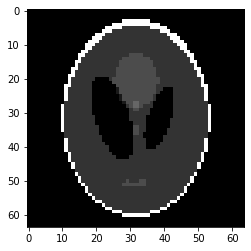

In [ ]:
phantom_temp = phantom()
phantom_temp = np.fliplr(np.flip(phantom_temp))

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm 

from skimage import color
from skimage import io

img = color.rgb2gray(phantom_temp)

plt.imshow(phantom_temp, cmap='gray')

Create complex phantom image

In [ ]:
phantom_shl = np.multiply(phantom_temp, np.exp(1j * phantom_temp))

Display magnitude, phase, real, and imaginary parts of the phantom image 

In [ ]:
a = np.angle(phantom_shl)
b = np.absolute(phantom_shl)
c = np.real(phantom_shl)
d = np.imag(phantom_shl)

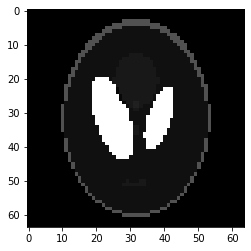

In [ ]:
plt.imshow(a, cmap='gray')

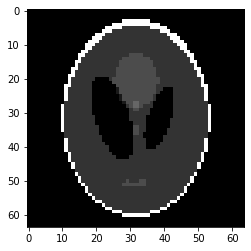

In [ ]:
plt.imshow(b, cmap='gray')

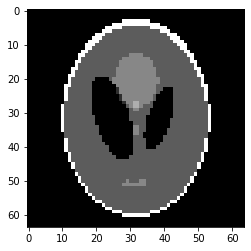

In [ ]:
plt.imshow(c, cmap='gray')

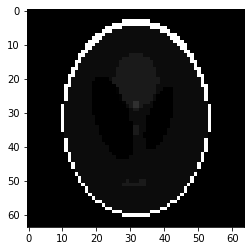

In [ ]:
plt.imshow(d, cmap='gray')

# Create phantom images for artificial coil channel sensitivities

1. Artificial coil channels sensitivities (6 channels)
2. Linear gradients in 6 directions
3. Adding more channels will improve the reconstruction

(64, 64)


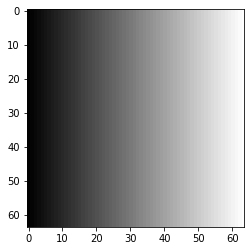

In [ ]:
import numpy.matlib


ramp1 = np.matlib.repmat(np.arange(0,127,2), 64, 1)
ramp2 = np.matlib.repmat(np.arange(0,255,2), 128, 1)

plt.imshow(ramp1, cmap='gray')

print(ramp1.shape)

In [ ]:
ch_sensitivity_1 = ramp1/64; # left-right gradient

ch_sensitivity_2 = np.rot90(ch_sensitivity_1) # bottom-up gradient
ch_sensitivity_3 = np.rot90(ch_sensitivity_2) # right-left gradient
ch_sensitivity_4 = np.rot90(ch_sensitivity_3) # up-bottom gradient


temp = np.rot90(ramp2/64, 45)

ch_sensitivity_5 = temp[60:124, 60:124] # diagonal left-right gradient
ch_sensitivity_6 = np.rot90(ch_sensitivity_5) # diagonal right-left 

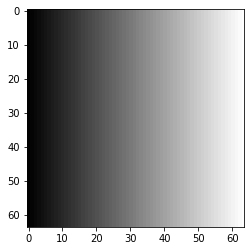

In [ ]:
plt.imshow(ch_sensitivity_1, cmap='gray')

In [ ]:
phantom_ch_1 = np.multiply(phantom_shl, ch_sensitivity_1)
phantom_ch_2 = np.multiply(phantom_shl, ch_sensitivity_2)
phantom_ch_3 = np.multiply(phantom_shl, ch_sensitivity_3)
phantom_ch_4 = np.multiply(phantom_shl, ch_sensitivity_4)
phantom_ch_5 = np.multiply(phantom_shl, ch_sensitivity_5)
phantom_ch_6 = np.multiply(phantom_shl, ch_sensitivity_6)

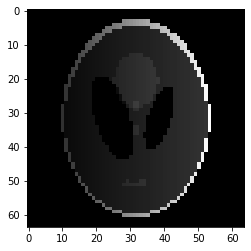

In [ ]:
plt.imshow(np.absolute(phantom_ch_1), cmap='gray')

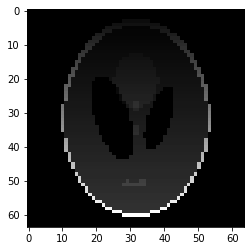

In [ ]:
plt.imshow(np.absolute(phantom_ch_4), cmap='gray')

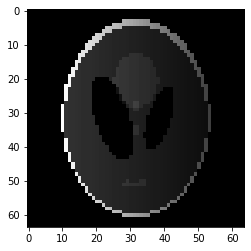

In [ ]:
plt.imshow(np.absolute(phantom_ch_6), cmap='gray')

In [ ]:
phantom_ch_1_k = np.fft.fftshift(np.fft.fft2(phantom_ch_1))
phantom_ch_2_k = np.fft.fftshift(np.fft.fft2(phantom_ch_2))
phantom_ch_3_k = np.fft.fftshift(np.fft.fft2(phantom_ch_3))
phantom_ch_4_k = np.fft.fftshift(np.fft.fft2(phantom_ch_4))
phantom_ch_5_k = np.fft.fftshift(np.fft.fft2(phantom_ch_5))
phantom_ch_6_k = np.fft.fftshift(np.fft.fft2(phantom_ch_6))

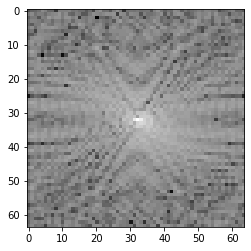

In [ ]:
plt.imshow(20*np.log(np.abs(phantom_ch_1_k)), cmap='gray')

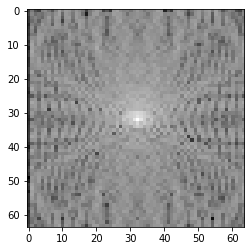

In [ ]:
plt.imshow(20*np.log(np.abs(phantom_ch_2_k)), cmap='gray')

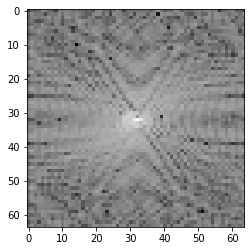

In [ ]:
plt.imshow(20*np.log(np.abs(phantom_ch_6_k)), cmap='gray')

# k-space undersampled twice (each second line is set to zeros)

In [ ]:
phantom_ch_1_k_u = np.zeros(np.shape(phantom_ch_1_k),dtype=complex)
phantom_ch_1_k_u[0:63:2,:] = phantom_ch_1_k[0:63:2,:]

phantom_ch_2_k_u = np.zeros(np.shape(phantom_ch_2_k),dtype=complex)
phantom_ch_2_k_u[0:63:2,:] = phantom_ch_2_k[0:63:2,:]

phantom_ch_3_k_u = np.zeros(np.shape(phantom_ch_3_k),dtype=complex)
phantom_ch_3_k_u[0:63:2,:] = phantom_ch_3_k[0:63:2,:]

phantom_ch_4_k_u = np.zeros(np.shape(phantom_ch_4_k),dtype=complex)
phantom_ch_4_k_u[0:63:2,:] = phantom_ch_4_k[0:63:2,:]

phantom_ch_5_k_u = np.zeros(np.shape(phantom_ch_5_k),dtype=complex)
phantom_ch_5_k_u[0:63:2,:] = phantom_ch_5_k[0:63:2,:]

phantom_ch_6_k_u = np.zeros(np.shape(phantom_ch_6_k),dtype=complex)
phantom_ch_6_k_u[0:63:2,:] = phantom_ch_6_k[0:63:2,:]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


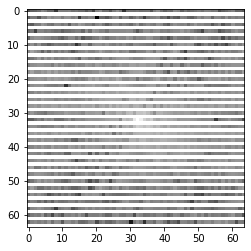

In [ ]:
plt.imshow(20*np.log(np.abs(phantom_ch_1_k_u)), cmap='gray')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


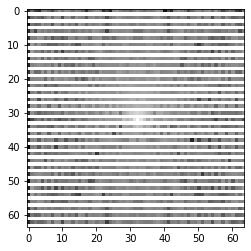

In [ ]:
plt.imshow(20*np.log(np.abs(phantom_ch_2_k_u)), cmap='gray')

# FT back to image space, to illustrate the ghosting artifact 

In [ ]:
phantom_ch_1_im_u = np.fft.ifft2(phantom_ch_1_k_u)
phantom_ch_2_im_u = np.fft.ifft2(phantom_ch_2_k_u)
phantom_ch_3_im_u = np.fft.ifft2(phantom_ch_3_k_u)
phantom_ch_4_im_u = np.fft.ifft2(phantom_ch_4_k_u)
phantom_ch_5_im_u = np.fft.ifft2(phantom_ch_5_k_u)
phantom_ch_6_im_u = np.fft.ifft2(phantom_ch_6_k_u)

In [ ]:
phantom_u_magn = np.abs(phantom_ch_1_im_u + phantom_ch_2_im_u + 
                                    phantom_ch_3_im_u + phantom_ch_4_im_u + 
                                     phantom_ch_5_im_u + phantom_ch_6_im_u)

# Reconstruct the Shepp-Logan phantom image from the under sampled k-space to show the artifact

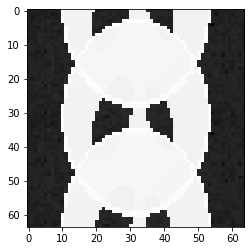

In [ ]:
plt.imshow(20*np.log(np.abs(phantom_u_magn)), cmap='gray')

# Choose autocalibration lines in kspace

### Choose middle 16 lines in k-space for autocalibration

In [ ]:
phantom_ch_1_k_acl = np.zeros(np.shape(phantom_ch_1_k),dtype=complex)
phantom_ch_1_k_acl[24:39,:] = phantom_ch_1_k[24:39,:]

phantom_ch_2_k_acl = np.zeros(np.shape(phantom_ch_2_k),dtype=complex)
phantom_ch_2_k_acl[24:39,:] = phantom_ch_2_k[24:39,:]

phantom_ch_3_k_acl = np.zeros(np.shape(phantom_ch_3_k),dtype=complex)
phantom_ch_3_k_acl[24:39,:] = phantom_ch_3_k[24:39,:]

phantom_ch_4_k_acl = np.zeros(np.shape(phantom_ch_4_k),dtype=complex)
phantom_ch_4_k_acl[24:39,:] = phantom_ch_4_k[24:39,:]

phantom_ch_5_k_acl = np.zeros(np.shape(phantom_ch_5_k),dtype=complex)
phantom_ch_5_k_acl[24:39,:] = phantom_ch_5_k[24:39,:]

phantom_ch_6_k_acl = np.zeros(np.shape(phantom_ch_6_k),dtype=complex)
phantom_ch_6_k_acl[24:39,:] = phantom_ch_6_k[24:39,:]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


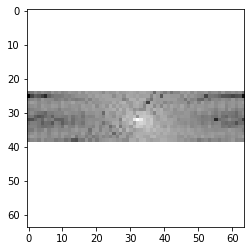

In [ ]:
plt.imshow(20*np.log(np.abs(phantom_ch_1_k_acl)), cmap='gray')

# Move kernel of size 3x3 to create the matrix of weights

### Reshape each 3x3 patch in a vector and put all of them into a temp source matrix for each channel of a coil

In [ ]:
from numpy.linalg import inv, pinv

S_ch_1_temp = np.random.rand(868,9)
S_ch_2_temp = np.random.rand(868,9)
S_ch_3_temp = np.random.rand(868,9)
S_ch_4_temp = np.random.rand(868,9)
S_ch_5_temp = np.random.rand(868,9)
S_ch_6_temp = np.random.rand(868,9)

kNo = 0; # kernel/patch number
for ny in range(24,38):   
    for nx in range(0,62):

        # ch1: each patch 3x3 is reshaped into vector and put into matrix one line after another
        S_ch_1_temp[kNo,:] = np.reshape(phantom_ch_1_k_acl[ny:ny+3,nx:nx+3], (1,9)) 

        # ch1: each patch 3x3 is reshaped into vector and put into matrix one line after another
        S_ch_2_temp[kNo,:] = np.reshape(phantom_ch_2_k_acl[ny:ny+3,nx:nx+3], (1,9)) 

        # ch1: each patch 3x3 is reshaped into vector and put into matrix one line after another
        S_ch_3_temp[kNo,:] = np.reshape(phantom_ch_3_k_acl[ny:ny+3,nx:nx+3], (1,9)) 

        # ch1: each patch 3x3 is reshaped into vector and put into matrix one line after another
        S_ch_4_temp[kNo,:] = np.reshape(phantom_ch_4_k_acl[ny:ny+3,nx:nx+3], (1,9)) 

        # ch1: each patch 3x3 is reshaped into vector and put into matrix one line after another
        S_ch_5_temp[kNo,:] = np.reshape(phantom_ch_5_k_acl[ny:ny+3,nx:nx+3], (1,9)) 

        # ch1: each patch 3x3 is reshaped into vector and put into matrix one line after another
        S_ch_6_temp[kNo,:] = np.reshape(phantom_ch_6_k_acl[ny:ny+3,nx:nx+3], (1,9)) 
       
        kNo = kNo + 1; # to move through all patches



S_ch_1_temp.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: ComplexWarning: Casting complex values to real discards the imaginary part


(868, 9)

### Remove three middle ("unknown") values. The remaiming values form source matrix S, for each channel

In [ ]:
S_ch_1 = np.zeros((868,6));S_ch_2 = np.zeros((868,6));S_ch_3 = np.zeros((868,6));S_ch_4 = np.zeros((868,6));S_ch_5 = np.zeros((868,6));S_ch_6 = np.zeros((868,6))

S_ch_1[:, 0:2] = S_ch_1_temp[:, 0:2]
S_ch_1[:, 3:5] = S_ch_1_temp[:, 6:8]

S_ch_2[:, 0:2] = S_ch_2_temp[:, 0:2]
S_ch_2[:, 3:5] = S_ch_2_temp[:, 6:8]

S_ch_3[:, 0:2] = S_ch_3_temp[:, 0:2]
S_ch_3[:, 3:5] = S_ch_3_temp[:, 6:8]

S_ch_4[:, 0:2] = S_ch_4_temp[:, 0:2]
S_ch_4[:, 3:5] = S_ch_4_temp[:, 6:8]

S_ch_5[:, 0:2] = S_ch_5_temp[:, 0:2]
S_ch_5[:, 3:5] = S_ch_5_temp[:, 6:8]

S_ch_6[:, 0:2] = S_ch_6_temp[:, 0:2]
S_ch_6[:, 3:5] = S_ch_6_temp[:, 6:8]


S_ch_1.shape

(868, 6)

### Middle points form target vector T for each channel

In [ ]:
T_ch_1 = np.zeros((868,1));T_ch_2 = np.zeros((868,1));T_ch_3 = np.zeros((868,1));T_ch_4 = np.zeros((868,1));T_ch_5 = np.zeros((868,1));T_ch_6 = np.zeros((868,1))

T_ch_1[:, 0] = S_ch_1_temp[:, 5]

T_ch_2[:, 0] = S_ch_2_temp[:, 5]

T_ch_3[:, 0] = S_ch_3_temp[:, 5]

T_ch_4[:, 0] = S_ch_4_temp[:, 5]

T_ch_5[:, 0] = S_ch_5_temp[:, 5]

T_ch_6[:, 0] = S_ch_6_temp[:, 5]

T_ch_1.shape

(868, 1)

In [ ]:
S = np.concatenate((S_ch_1, S_ch_2, S_ch_3, S_ch_4, S_ch_5, S_ch_6), axis=1)
T = np.concatenate((T_ch_1, T_ch_2, T_ch_3, T_ch_4, T_ch_5, T_ch_6), axis=1)

print(S.shape)
print(T.shape)

(868, 36)
(868, 6)


### Invert S to find weights

In [ ]:
W = np.matmul(np.linalg.pinv(S), T);

W.shape

(36, 6)

# Forward problem to find missing lines

### Construct source matric from the undersampled image

In [ ]:
S_ch_1_new_temp = np.random.rand(1922,9)
S_ch_2_new_temp = np.random.rand(1922,9)
S_ch_3_new_temp = np.random.rand(1922,9)
S_ch_4_new_temp = np.random.rand(1922,9)
S_ch_5_new_temp = np.random.rand(1922,9)
S_ch_6_new_temp = np.random.rand(1922,9)

kNo = 0; # kernel/patch number
for ny in range(0, (63-2), 2):
    for nx in range(0, 63-2):

        # ch1: each patch 3x3 is reshaped into vector and put into matrix one line after another
        S_ch_1_new_temp[kNo,:] = np.reshape(phantom_ch_1_k_u[ny:ny+3,nx:nx+3], (1,9)) 

        # ch2: each patch 3x3 is reshaped into vector and put into matrix one line after another
        S_ch_2_new_temp[kNo,:] = np.reshape(phantom_ch_2_k_u[ny:ny+3,nx:nx+3], (1,9))  

        # ch3: each patch 3x3 is reshaped into vector and put into matrix one line after another
        S_ch_3_new_temp[kNo,:] = np.reshape(phantom_ch_3_k_u[ny:ny+3,nx:nx+3], (1,9)) 

        # ch4: each patch 3x3 is reshaped into vector and put into matrix one line after another
        S_ch_4_new_temp[kNo,:] = np.reshape(phantom_ch_4_k_u[ny:ny+3,nx:nx+3], (1,9)) 

        # ch5: each patch 3x3 is reshaped into vector and put into matrix one line after another
        S_ch_5_new_temp[kNo,:] = np.reshape(phantom_ch_5_k_u[ny:ny+3,nx:nx+3], (1,9)) 

        # ch6: each patch 3x3 is reshaped into vector and put into matrix one line after another
        S_ch_6_new_temp[kNo,:] = np.reshape(phantom_ch_6_k_u[ny:ny+3,nx:nx+3], (1,9)) 
       
        kNo = kNo + 1; # to move through all patches

S_ch_1_new_temp.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: ComplexWarning: Casting complex values to real discards the imaginary part


(1922, 9)

In [ ]:
S_ch_1_new = np.zeros((1922,6));S_ch_2_new = np.zeros((1922,6));S_ch_3_new = np.zeros((1922,6));S_ch_4_new = np.zeros((1922,6));S_ch_5_new = np.zeros((1922,6));S_ch_6_new = np.zeros((1922,6))

S_ch_1_new[:, 0:2] = S_ch_1_new_temp[:, 0:2]
S_ch_1_new[:, 3:5] = S_ch_1_new_temp[:, 6:8]

S_ch_2_new[:, 0:2] = S_ch_2_new_temp[:, 0:2]
S_ch_2_new[:, 3:5] = S_ch_2_new_temp[:, 6:8]

S_ch_3_new[:, 0:2] = S_ch_3_new_temp[:, 0:2]
S_ch_3_new[:, 3:5] = S_ch_3_new_temp[:, 6:8]

S_ch_4_new[:, 0:2] = S_ch_4_new_temp[:, 0:2]
S_ch_4_new[:, 3:5] = S_ch_4_new_temp[:, 6:8]

S_ch_5_new[:, 0:2] = S_ch_5_new_temp[:, 0:2]
S_ch_5_new[:, 3:5] = S_ch_5_new_temp[:, 6:8]

S_ch_6_new[:, 0:2] = S_ch_6_new_temp[:, 0:2]
S_ch_6_new[:, 3:5] = S_ch_6_new_temp[:, 6:8]

In [ ]:
S_new = np.concatenate((S_ch_1_new, S_ch_2_new, S_ch_3_new, S_ch_4_new, S_ch_5_new, S_ch_6_new), axis=1)

S_new.shape

(1922, 36)

### T_unknown = S_undersampled * W

In [ ]:
T_new = np.matmul(S_new, W)

T_new.shape

(1922, 6)

## Filling in the missing lines into undersampled image

In [ ]:
T_ch_1_new_M = np.reshape(T_new[:,0], (62, 31)); 
T_ch_2_new_M = np.reshape(T_new[:,1], (62, 31)); 
T_ch_3_new_M = np.reshape(T_new[:,2], (62, 31)); 
T_ch_4_new_M = np.reshape(T_new[:,3], (62, 31)); 
T_ch_5_new_M = np.reshape(T_new[:,4], (62, 31)); 
T_ch_6_new_M = np.reshape(T_new[:,5], (62, 31)); 



T_ch_1_new_M = np.transpose(T_ch_1_new_M)
T_ch_2_new_M = np.transpose(T_ch_2_new_M)
T_ch_3_new_M = np.transpose(T_ch_3_new_M)
T_ch_4_new_M = np.transpose(T_ch_4_new_M)
T_ch_5_new_M = np.transpose(T_ch_5_new_M)
T_ch_6_new_M = np.transpose(T_ch_6_new_M)

In [ ]:
P1_f_u_new = phantom_ch_1_k_u;
P2_f_u_new = phantom_ch_2_k_u;
P3_f_u_new = phantom_ch_3_k_u;
P4_f_u_new = phantom_ch_4_k_u;
P5_f_u_new = phantom_ch_5_k_u;
P6_f_u_new = phantom_ch_6_k_u;

In [ ]:
P1_f_u_new[0:62:2,0:62] = T_ch_1_new_M;
P2_f_u_new[0:62:2,0:62] = T_ch_2_new_M;
P3_f_u_new[0:62:2,0:62] = T_ch_3_new_M;
P4_f_u_new[0:62:2,0:62] = T_ch_4_new_M;
P5_f_u_new[0:62:2,0:62] = T_ch_5_new_M;
P6_f_u_new[0:62:2,0:62] = T_ch_6_new_M;

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


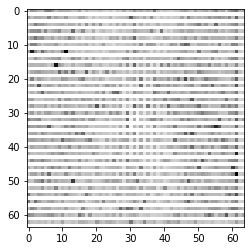

In [ ]:
plt.imshow(20*np.log(np.abs(phantom_ch_1_k_u)), cmap='gray')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


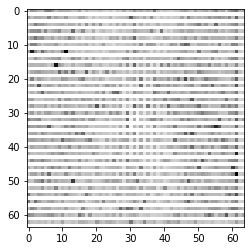

In [ ]:
plt.imshow(20*np.log(np.abs(P1_f_u_new)), cmap='gray')

## Fourier transform restored k-space for each channel

In [ ]:
Im_Recon_ch_1 =  np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(P1_f_u_new)))
Im_Recon_ch_2 =  np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(P2_f_u_new)))
Im_Recon_ch_3 =  np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(P3_f_u_new)))
Im_Recon_ch_4 =  np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(P4_f_u_new)))
Im_Recon_ch_5 =  np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(P5_f_u_new)))
Im_Recon_ch_6 =  np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(P6_f_u_new)))

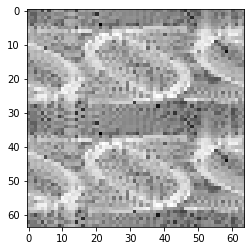

In [ ]:
plt.imshow(20*np.log(np.abs(Im_Recon_ch_1)), cmap='gray')

In [ ]:
Im_Recon = np.sqrt(np.abs(Im_Recon_ch_1 + Im_Recon_ch_2 +  Im_Recon_ch_3 + Im_Recon_ch_4 + Im_Recon_ch_5 + Im_Recon_ch_6))

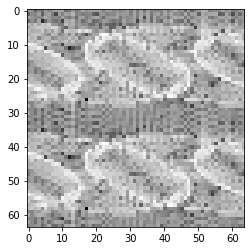

In [ ]:
plt.imshow(20*np.log(np.abs(Im_Recon)), cmap='gray')